In [1]:
%matplotlib inline


Custom Boundary Shape
---------------------

This example demonstrates how a custom shape geometry may be used
instead of the projection's default boundary.

In this instance, we define the boundary as a circle in axes coordinates.
This means that no matter the extent of the map itself, the boundary will
always be a circle.




C:\ProgramData\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


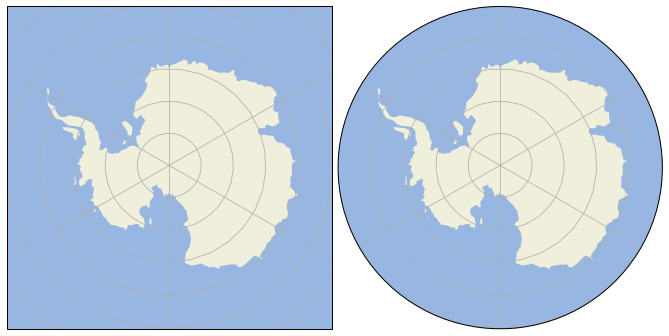

In [2]:
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature


def main():
    fig = plt.figure(figsize=[10, 5])
    ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.SouthPolarStereo())
    ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.SouthPolarStereo(),
                          sharex=ax1, sharey=ax1)
    fig.subplots_adjust(bottom=0.05, top=0.95,
                        left=0.04, right=0.95, wspace=0.02)

    # Limit the map to -60 degrees latitude and below.
    ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    ax1.add_feature(cfeature.LAND)
    ax1.add_feature(cfeature.OCEAN)

    ax1.gridlines()
    ax2.gridlines()

    ax2.add_feature(cfeature.LAND)
    ax2.add_feature(cfeature.OCEAN)

    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax2.set_boundary(circle, transform=ax2.transAxes)

    plt.show()


if __name__ == '__main__':
    main()